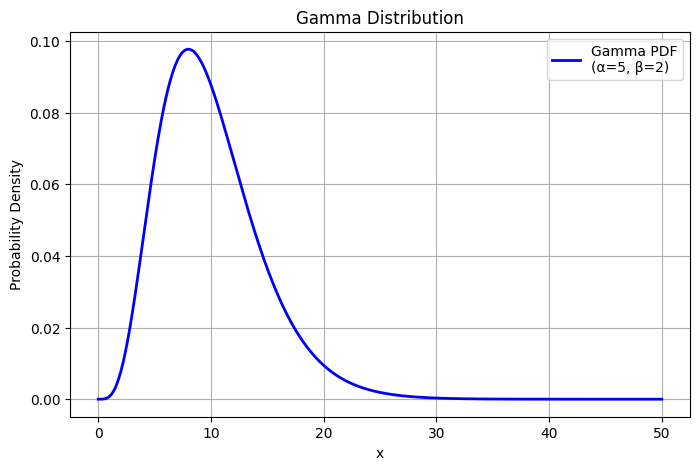

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters for the Gamma distribution
alpha = 5    # shape
beta = 2     # scale (note: scale = 1/rate)

# Create a range of x values
x = np.linspace(0, 50, 500)

# PDF of Gamma distribution
pdf = gamma.pdf(x, a=alpha, scale=beta)

# Plot the Gamma distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, 'b-', lw=2, label=f'Gamma PDF\n(α={alpha}, β={beta})')
plt.title("Gamma Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()


In [4]:
selected = np.array([1, 0, 1, 0, 0])
np.where(selected == 1)[0]


array([0, 2])